In [3]:
import pandas as pd
import numpy as np

from images import Images, now, save, load
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

import seaborn as sns
import matplotlib.pyplot as plt
import time
import plotly.express as px

In [6]:
filepath = "/Volumes/STORAGE FD/Machine Learning Project/objects/24k_sample_train_and_test_features_.pickle"

In [7]:
images = load(filepath)

[21:51:12]: Start
[21:51:15]: End


<h3> 1. Transforming Images into numpy arrays </h3> 

In [105]:
X_train_np = np.array(images.train_X)
y_train = np.array(images.train_Y)
X_test_np = np.array(images.test_X)
y_test = np.array(images.test_Y)

### 2. Feature Dataset

In [151]:
features = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 
            'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 
            'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8',
            'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8',
            'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8',
            'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
            'H_MX', 'S_MX', 'V_MX',
            'L1', 'L2', 'L3', 'L4',
            'ED1', 'ED2', 'ED3', 
            'DARKRATIO',
            'ETR1', 'ETR2', 'ETR3', 'ETR4']

In [154]:
def flatten(i, ds):
    bgr = ds[i][0:24]
    hsv = ds[i][24:25][0]
    hsvmx = np.array(ds[i][25:26][0])
    lummean = ds[i][26:27][0]
    edmean = ds[i][27:28][0]
    dr = ds[i][28:29]
    etrmean = ds[i][29:30][0]

    arrays = (bgr, hsv,hsvmx,lummean,edmean,dr,etrmean)
    new_array = np.hstack(arrays)
    return new_array

In [155]:
X_train_new = np.array([flatten(i, X_train_np) for i in range(0,len(X_train_np))])
X_test_new = np.array([flatten(i, X_test_np) for i in range(0,len(X_test_np))])

In [156]:
renamed_cols = {old:new for old,new in zip([i for i in range(0,63)], features)}
train_df = pd.DataFrame(X_train_new).rename(renamed_cols,axis=1).astype(float)
train_df['genre'] = y_train

In [188]:
test_df = pd.DataFrame(X_test_new).rename(renamed_cols,axis=1).astype(float)
test_df['genre'] = y_test

In [189]:
whole_df = pd.concat([train_df,test_df]).reset_index().drop(['index'],axis=1)

In [192]:
print(len(whole_df))
print(train_df.shape)
print(test_df.shape)

24000
(16800, 64)
(7200, 64)


## RGB

## HSV

## Lumnosity

## Edges

## Entropy

## Ratio of Dark Pixels

In [193]:
edges = whole_df.groupby(['genre']).mean().loc[:,'ED1':'ED3']
edges.rename({'ED1':'Normal', 'ED2':'Blurred','ED3':'Sharpened'},axis=1,inplace=True)

edges_melt = pd.melt(edges.reset_index(), id_vars='genre', value_vars=edges.columns).sort_values('value')

fig = px.bar(edges_melt, color='genre',x='variable', y='value',barmode='group',template='simple_white',
            color_discrete_sequence=px.colors.qualitative.Set3, title="Mean Edge Ratio",)
fig.show()

In [194]:
darkratios = whole_df.groupby(['genre']).mean().loc[:,'DARKRATIO']

fig = px.bar(darkratios.sort_values(), x=darkratios.index, y='DARKRATIO',barmode='group',template='simple_white',
            color_discrete_sequence=px.colors.qualitative.Set3, title="Mean Dark Ratio")
fig.show()

In [195]:
edges = whole_df.groupby(['genre']).mean().loc[:,'R1':'R8']
#edges.rename({'ED1':'Normal', 'ED2':'Blurred','ED3':'Sharpened'},axis=1,inplace=True)

edges_melt = pd.melt(edges.reset_index(), id_vars='genre', value_vars=edges.columns).sort_values('variable')

fig = px.bar(edges_melt, x='genre',color='variable', y='value',barmode='group',template='simple_white',
            color_discrete_sequence=["indianred"], title="Mean Red Histogram (Normalized) in 8 intervals")
fig.show()

In [196]:
edges = whole_df.groupby(['genre']).mean().loc[:,'B1':'B8']
#edges.rename({'ED1':'Normal', 'ED2':'Blurred','ED3':'Sharpened'},axis=1,inplace=True)

edges_melt = pd.melt(edges.reset_index(), id_vars='genre', value_vars=edges.columns).sort_values('variable')

fig = px.bar(edges_melt, x='genre',color='variable', y='value',barmode='group',template='simple_white',
            color_discrete_sequence=["cornflowerblue"], title="Mean Blue Histogram (Normalized) in 8 intervals")
fig.show()

In [197]:
edges = whole_df.groupby(['genre']).mean().loc[:,'G1':'G8']
#edges.rename({'ED1':'Normal', 'ED2':'Blurred','ED3':'Sharpened'},axis=1,inplace=True)

edges_melt = pd.melt(edges.reset_index(), id_vars='genre', value_vars=edges.columns).sort_values('variable')

fig = px.bar(edges_melt, x='genre',color='variable', y='value',barmode='group',template='simple_white',
            color_discrete_sequence=["mediumseagreen"], 
             title="Mean Green Histogram (Normalized) in 8 intervals")

fig.show()

In [198]:
edges = whole_df.groupby(['genre']).mean().loc[:,'S1':'S8']
#edges.rename({'ED1':'Normal', 'ED2':'Blurred','ED3':'Sharpened'},axis=1,inplace=True)

edges_melt = pd.melt(edges.reset_index(), id_vars='genre', value_vars=edges.columns).sort_values('variable')

fig = px.bar(edges_melt, x='genre',color='variable', y='value',barmode='group',template='simple_white',
            color_discrete_sequence=["slategray"], 
             title="Mean Saturation Histogram (Normalized) in 8 intervals")

fig.show()

In [199]:
edges = whole_df.groupby(['genre']).mean().loc[:,'V1':'V8']
#edges.rename({'ED1':'Normal', 'ED2':'Blurred','ED3':'Sharpened'},axis=1,inplace=True)

edges_melt = pd.melt(edges.reset_index(), id_vars='genre', value_vars=edges.columns).sort_values('variable')

fig = px.bar(edges_melt, x='genre',color='variable', y='value',barmode='group',template='simple_white',
            color_discrete_sequence=["slategray"], 
             title="Mean V (luminance) (Normalized) in 8 intervals")

fig.show()

In [200]:
edges = whole_df.groupby(['genre']).mean().loc[:,'L1':'L4']
#edges.rename({'ED1':'Normal', 'ED2':'Blurred','ED3':'Sharpened'},axis=1,inplace=True)

edges_melt = pd.melt(edges.reset_index(), id_vars='genre', value_vars=edges.columns).sort_values('variable')

fig = px.bar(edges_melt, x='genre',color='variable', y='value',barmode='group',template='simple_white',
            color_discrete_sequence=['lightsteelblue','cornflowerblue','darksalmon','coral'], title="Mean Lumnosity per Quadrant")
fig.show()

In [201]:
edges = whole_df.groupby(['genre']).mean().loc[:,'ETR1':'ETR4']

edges_melt = pd.melt(edges.reset_index(), id_vars='genre', value_vars=edges.columns).sort_values('variable')
fig = px.bar(edges_melt, x='genre',color='variable', y='value',barmode='group',template='simple_white',
            color_discrete_sequence=['lightsteelblue','cornflowerblue','darksalmon','coral'], 
             title="Mean Entropy per Quadrant")

fig.show()

<h3> 3. Scaling feature set </h3>

In [203]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.model import train_test_split

In [205]:
scaler = StandardScaler()

print(now(), "Starting")
X_train_scaled = scaler.fit_transform(X_train_new)
print(now(), "Finished training dataset, Starting testing set")
X_test_scaled = scaler.fit_transform(X_test_new)
print(now(), "Finished")

[22:18:02] Starting
[22:18:02] Finished training dataset, Starting testing set
[22:18:02] Finished


<h3> 4. Models </h3>

In [208]:
models = {
    "Logistic Regression" : LogisticRegression(multi_class='multinomial',tol=.01,solver='sag'),
    "KNearest Neighbors (n=3)" : KNeighborsClassifier(3),
    "Support Vector Machines" : svm.SVC(decision_function_shape='ovo'),
    "AdaBoost - Logistic Regression" : AdaBoostClassifier(LogisticRegression(multi_class='multinomial',tol=.01,solver='sag'),n_estimators=100),
    "AdaBoost - Decision Trees (entropy)" :  AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5) ,n_estimators=100),
    "AdaBoost - Decision Trees (gini)" :  AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=7) ,n_estimators=100),
         }

In [209]:
models_y_train = dict()
models_y_test = dict()

for name, model in models.items():
    print("Model:",name, end=" | ")
    model.fit(X_train_scaled, y_train)
    
    y_train_pred = model.predict(X_train_scaled) 
    train_acc = accuracy_score(y_train,y_train_pred)
    
    models_y_train[name] = (y_train,y_train_pred)
    
    y_test_pred = model.predict(X_test_scaled)
    test_acc = accuracy_score(y_test,y_test_pred)
    
    models_y_test[name] = (y_test,y_test_pred)
    
    print("train accuracy:", round(train_acc,3) , "test accuracy: ", round(test_acc,3))

Model: Logistic Regression | train accuracy: 0.254 test accuracy:  0.234
Model: KNearest Neighbors (n=3) | train accuracy: 0.507 test accuracy:  0.202
Model: Support Vector Machines | train accuracy: 0.418 test accuracy:  0.278
Model: AdaBoost - Logistic Regression | train accuracy: 0.215 test accuracy:  0.209
Model: AdaBoost - Decision Trees (entropy) | train accuracy: 0.393 test accuracy:  0.172
Model: AdaBoost - Decision Trees (gini) | train accuracy: 0.55 test accuracy:  0.161


### 5. Metrics

In [220]:
def output_metrics(y, yhat, name, output=False):
    df = pd.DataFrame({"observed" : y, "predicted": yhat})
    df['count'] = 1
    sorted_df = df.groupby(["observed","predicted"]).sum().sort_values(['count'], ascending=False)
    
    genres = np.unique(y_train)
    combos = list(sorted_df.index)
    
    genre_pref = []
        
    for genre in genres:
        try:
            tp = sorted_df.loc[genre,genre]['count']
        except KeyError as e:
            tp = 0
        
        fp = len(df[df['predicted'] == genre]) - tp
        tmp = df[df['predicted'] != genre]
        tn = len(tmp[tmp['observed'] != genre])
        fn = len(df[df['observed'] == genre]) - tp
        
        accuracy, precision, recall, f1, fpr = report_metrics(tn, fp, fn, tp, genre, False)
        
        genre_pref.append(pd.Series({
            'genre' : genre,
            'accuracy' : accuracy,
            'f1' : f1,
            'precision' : precision,
            'recall' : recall,
            'fpr' : fpr
        }))
    
    cf_matrix = create_conf_matrix(df,sorted_df, genres, combos)
    
    if output:
        colormap = sns.color_palette("Greens")
        sns.set(rc={'figure.figsize':(10,8.27)})
        ax = sns.heatmap(cf_matrix.astype(int), annot=True,cmap=colormap)
        ax.set_title(name)
    
    cmatrix = pd.concat(genre_pref,axis=1).T
    
    return cmatrix.sort_values('recall',ascending=False)

In [211]:
def create_conf_matrix(df, sorted_df, genres, combos):
    rows = []
    for genre_row in genres:
        row_dict = dict()
        row_dict['predicted_genre'] = genre_row
        
        for genre_col in genres:
            pair = (genre_col, genre_row)
            if pair in combos: # observed, predicted
                num = sorted_df.loc[pair]['count']
            else:
                num = 0
            row_dict[genre_col] = num
        rows.append(pd.Series(row_dict))
        
    matrix = pd.concat(rows, axis=1).T
    matrix.index = matrix['predicted_genre']
    matrix.drop(['predicted_genre'],axis=1,inplace=True)
        
    return matrix

In [212]:
def report_metrics(tn, fp, fn, tp, genre, output=True):
    """
    Manually calculates associated scores and outputs them
    """
    conf_matrix = pd.DataFrame({f"Obsv {genre}" : [tp, fn], f"Obsv not {genre}" : [fp, tn]}).rename({0:f'Pred {genre}', 1:'Pred Neg'})
    
    accuracy = (tp + tn) / (tp + fp + fn + tn)    
    precision = (tp) / (tp + fp) 
    recall = (tp) / (tp + fn) ## TPR
    
    if tp != 0:
        f1 = 2 * ((precision * recall) / (precision + recall))
    else:
        f1 = 0

    fpr = fp / (fp + tn)
    
    if output:
        display(conf_matrix)
        print(f"True Positives: {tp}, False Positives: {fp}, True Negatives: {tn}, False Negatives: {fn}")
        print(f"Accuracy: {round(accuracy, 5)}, Error: {round(1 - accuracy, 5)}""")
        print(f"Precision: {round(precision, 5)}, Recall: {round(recall, 5)}")
        print(f"F1-score: {round(f1,5)}")

    return accuracy, precision, recall, f1, fpr

,genre,accuracy,f1,precision,recall,fpr
11,Rococo,0.891528,0.315513,0.272315,0.375,0.0715774
5,Impressionism,0.885139,0.298558,0.251788,0.366667,0.0778274
2,Baroque,0.88625,0.290909,0.248889,0.35,0.0754464
0,Abstract Expressionism,0.886389,0.277385,0.240798,0.327083,0.0736607
3,Cubism,0.899444,0.285996,0.271536,0.302083,0.0578869
8,Northern Renaissance,0.894444,0.266409,0.248201,0.2875,0.0622024
1,Art Nouveau (Modern),0.889167,0.252809,0.229592,0.28125,0.0674107
7,Neoclassicism,0.904028,0.280957,0.280665,0.28125,0.0514881
14,Symbolism,0.883194,0.192123,0.178253,0.208333,0.0686012
9,Post-Impressionism,0.898056,0.19163,0.203271,0.18125,0.050744


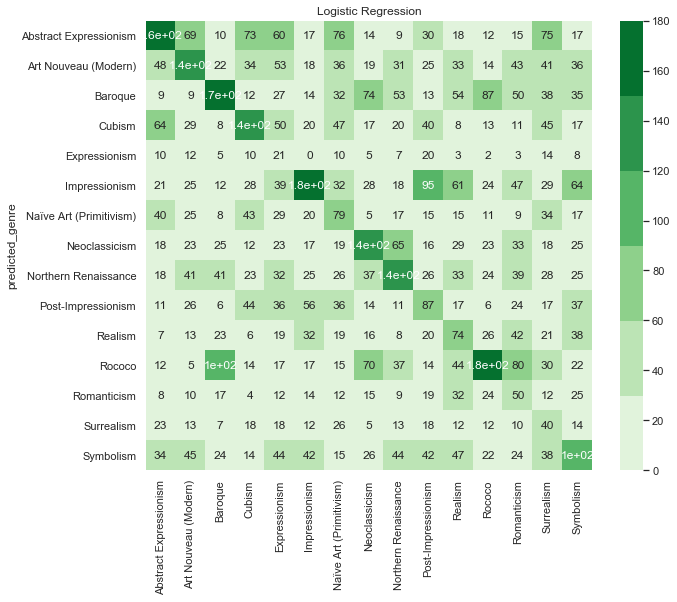

In [221]:
n = 0

name = list(models_y_test.keys())[n]
pair =  list(models_y_test.values())[n]

cmatrix_genre = output_metrics(pair[0], pair[1],name, True)
cmatrix_genre   

In [214]:
n = 1

name = list(models_y_test.keys())[n]
pair =  list(models_y_test.values())[n]

cmatrix_genre = output_metrics(pair[0], pair[1],name)
cmatrix_genre   

,genre,accuracy,f1,precision,recall,fpr
2,Baroque,0.838056,0.263889,0.189312,0.435417,0.133185
0,Abstract Expressionism,0.860556,0.251863,0.196056,0.352083,0.103125
1,Art Nouveau (Modern),0.856111,0.229167,0.178241,0.320833,0.105655
7,Neoclassicism,0.903333,0.302605,0.291506,0.314583,0.0546131
3,Cubism,0.866667,0.190556,0.160057,0.235417,0.088244
5,Impressionism,0.884722,0.214015,0.196181,0.235417,0.0688988
8,Northern Renaissance,0.905833,0.23991,0.259709,0.222917,0.0453869
6,Naïve Art (Primitivism),0.901806,0.190149,0.211196,0.172917,0.046131
11,Rococo,0.914861,0.209032,0.274576,0.16875,0.0318452
4,Expressionism,0.873889,0.136882,0.125874,0.15,0.0744048


In [215]:
n = 2

name = list(models_y_test.keys())[n]
pair =  list(models_y_test.values())[n]

cmatrix_genre = output_metrics(pair[0], pair[1],name)
cmatrix_genre   

,genre,accuracy,f1,precision,recall,fpr
11,Rococo,0.894583,0.351836,0.298119,0.429167,0.0721726
2,Baroque,0.89,0.341098,0.283934,0.427083,0.0769345
5,Impressionism,0.880972,0.317131,0.256774,0.414583,0.0857143
1,Art Nouveau (Modern),0.889306,0.324003,0.273247,0.397917,0.0755952
0,Abstract Expressionism,0.903611,0.352612,0.319257,0.39375,0.0599702
8,Northern Renaissance,0.909583,0.358621,0.340187,0.379167,0.0525298
3,Cubism,0.908472,0.289105,0.299776,0.279167,0.0465774
7,Neoclassicism,0.932917,0.356858,0.494465,0.279167,0.0203869
6,Naïve Art (Primitivism),0.915972,0.259486,0.31454,0.220833,0.034375
9,Post-Impressionism,0.889861,0.210945,0.201905,0.220833,0.0623512


In [216]:
n = 3

name = list(models_y_test.keys())[n]
pair =  list(models_y_test.values())[n]

cmatrix_genre = output_metrics(pair[0], pair[1],name)
cmatrix_genre   

,genre,accuracy,f1,precision,recall,fpr
11,Rococo,0.882778,0.308197,0.254054,0.391667,0.0821429
5,Impressionism,0.869583,0.265833,0.212766,0.354167,0.0936012
8,Northern Renaissance,0.875833,0.248739,0.208451,0.308333,0.083631
2,Baroque,0.879167,0.247405,0.211538,0.297917,0.0793155
1,Art Nouveau (Modern),0.877778,0.233449,0.200599,0.279167,0.0794643
0,Abstract Expressionism,0.889028,0.248354,0.226415,0.275,0.0671131
3,Cubism,0.911944,0.255869,0.293011,0.227083,0.0391369
7,Neoclassicism,0.892361,0.211597,0.206759,0.216667,0.059375
14,Symbolism,0.885694,0.182721,0.174573,0.191667,0.0647321
9,Post-Impressionism,0.893333,0.170626,0.17713,0.164583,0.0546131


In [217]:
n = 4

name = list(models_y_test.keys())[n]
pair =  list(models_y_test.values())[n]

cmatrix_genre = output_metrics(pair[0], pair[1],name)
cmatrix_genre   

,genre,accuracy,f1,precision,recall,fpr
1,Art Nouveau (Modern),0.883611,0.231193,0.206557,0.2625,0.0720238
11,Rococo,0.901389,0.261954,0.261411,0.2625,0.0529762
5,Impressionism,0.87875,0.204193,0.181524,0.233333,0.0751488
2,Baroque,0.897917,0.196721,0.206897,0.1875,0.0513393
10,Realism,0.867361,0.141959,0.124803,0.164583,0.0824405
14,Symbolism,0.882778,0.157685,0.151341,0.164583,0.0659226
3,Cubism,0.908611,0.191646,0.233533,0.1625,0.0380952
8,Northern Renaissance,0.898194,0.173619,0.189189,0.160417,0.0491071
13,Surrealism,0.881528,0.152929,0.14611,0.160417,0.0669643
0,Abstract Expressionism,0.917222,0.203209,0.283582,0.158333,0.0285714


In [218]:
n = 0

name = list(models_y_test.keys())[n]
pair =  list(models_y_test.values())[n]

cmatrix_genre = output_metrics(pair[0], pair[1],name,False)
print(name)
cmatrix_genre   

Logistic Regression


,genre,accuracy,f1,precision,recall,fpr
11,Rococo,0.891528,0.315513,0.272315,0.375,0.0715774
5,Impressionism,0.885139,0.298558,0.251788,0.366667,0.0778274
2,Baroque,0.88625,0.290909,0.248889,0.35,0.0754464
0,Abstract Expressionism,0.886389,0.277385,0.240798,0.327083,0.0736607
3,Cubism,0.899444,0.285996,0.271536,0.302083,0.0578869
8,Northern Renaissance,0.894444,0.266409,0.248201,0.2875,0.0622024
1,Art Nouveau (Modern),0.889167,0.252809,0.229592,0.28125,0.0674107
7,Neoclassicism,0.904028,0.280957,0.280665,0.28125,0.0514881
14,Symbolism,0.883194,0.192123,0.178253,0.208333,0.0686012
9,Post-Impressionism,0.898056,0.19163,0.203271,0.18125,0.050744
